In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [48]:
df= pd.read_excel('content/covid_19_india.xlsx')
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [49]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [50]:
dbd_India = pd.read_excel('content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

In [51]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Blues_r')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


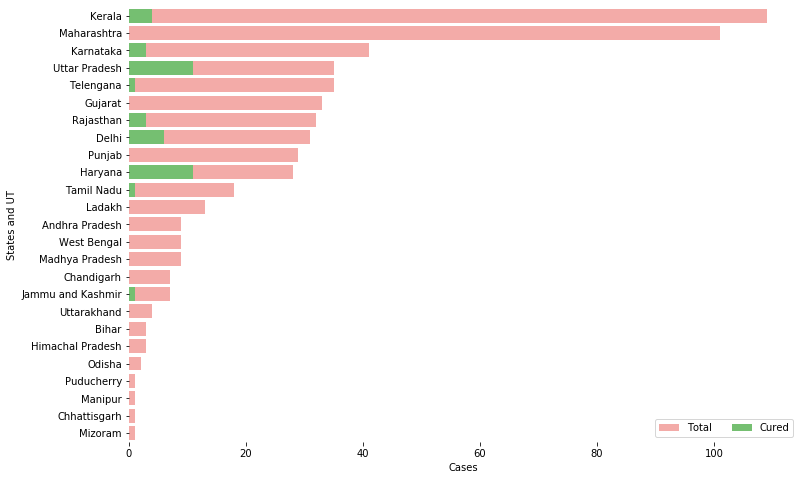

In [52]:
f, ax = plt.subplots(figsize=(12, 8))
data = df[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases', ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="States and UT",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [54]:
df = pd.read_csv('content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("content/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [55]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [57]:
df_india = df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india[['Date','Confirmed']], df_india[['Date','Deaths']], df_india[['Date','Recovered']]

In [58]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [59]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [60]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [61]:
from fbprophet import Prophet

In [62]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [63]:
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [64]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,335726.572487,373687.330813
65,2020-03-27,372235.326939,351636.607934,393104.997440
66,2020-03-28,388674.964143,368194.595899,410495.553799
67,2020-03-29,405307.954676,384089.303170,427055.753134
68,2020-03-30,418529.648467,396315.865815,442350.885733


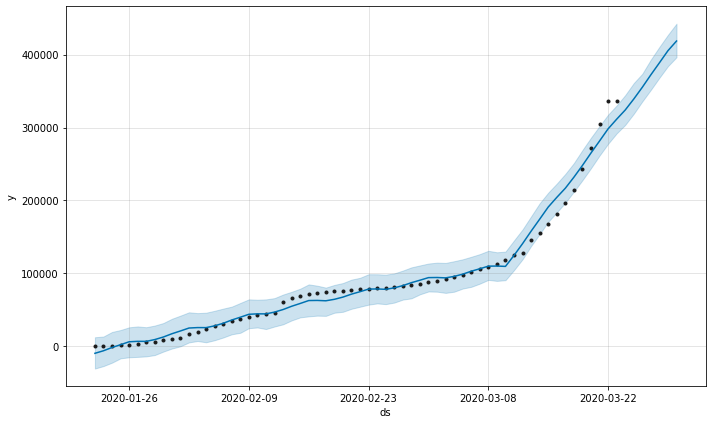

In [66]:
confirmed_forecast_plot = m.plot(forecast)

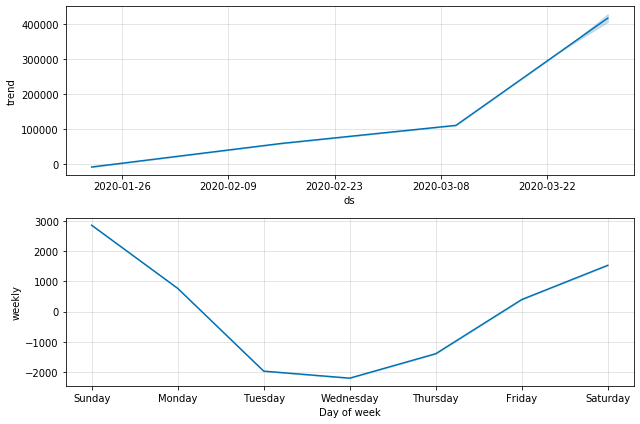

In [67]:
confirmed_forecast_plot = m.plot_components(forecast)

In [68]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [69]:
m = Prophet()
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [70]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14852.684597,16054.870383
65,2020-03-27,16199.617603,15512.098858,16842.099445
66,2020-03-28,17006.904589,16420.297980,17692.894305
67,2020-03-29,17831.505383,17108.966498,18432.040780
68,2020-03-30,18490.986176,17813.355221,19186.245949


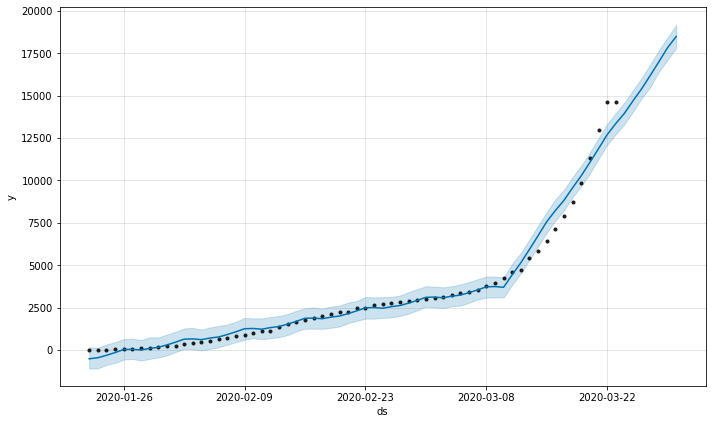

In [71]:
deaths_forecast_plot = m.plot(forecast)

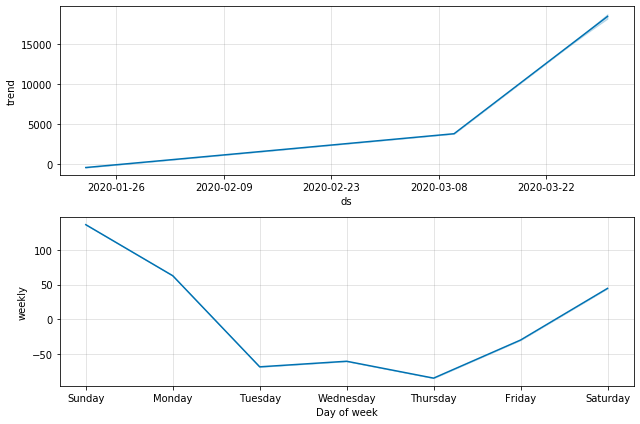

In [72]:
deaths_forecast_plot = m.plot_components(forecast)

In [73]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [74]:
m = Prophet()
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [75]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351979,101939.206989,104096.678038
65,2020-03-27,105338.025206,104146.101170,106509.477555
66,2020-03-28,108256.310913,106872.549816,109492.891176
67,2020-03-29,111119.296134,109730.797232,112607.833593
68,2020-03-30,113244.961701,111571.441578,114844.003291


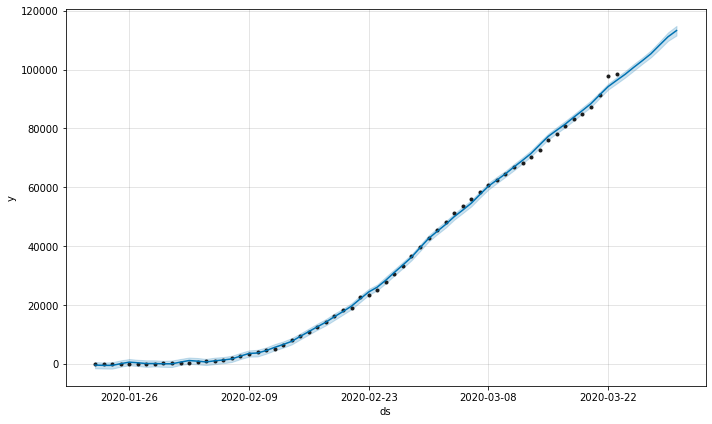

In [76]:
recovered_forecast_plot = m.plot(forecast)

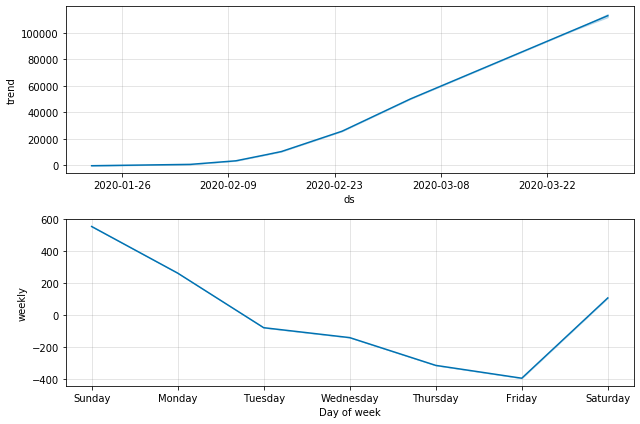

In [77]:
recovered_forecast_plot = m.plot_components(forecast)

In [78]:
india_confirmed.columns = ['ds','y']
india_confirmed['ds'] = pd.to_datetime(india_confirmed['ds'])

In [79]:
m = Prophet()
m.fit(india_confirmed)
future = m.make_future_dataframe(periods=7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
62,2020-03-24,133.996684,50.580732,218.833995
63,2020-03-25,147.613725,68.049214,228.755023
64,2020-03-26,153.433237,73.753074,235.921200
65,2020-03-27,160.140437,75.402724,240.379687
66,2020-03-28,172.292065,89.040581,254.364684
67,2020-03-29,181.553191,99.194546,266.554588
68,2020-03-30,183.035658,102.247584,265.776695


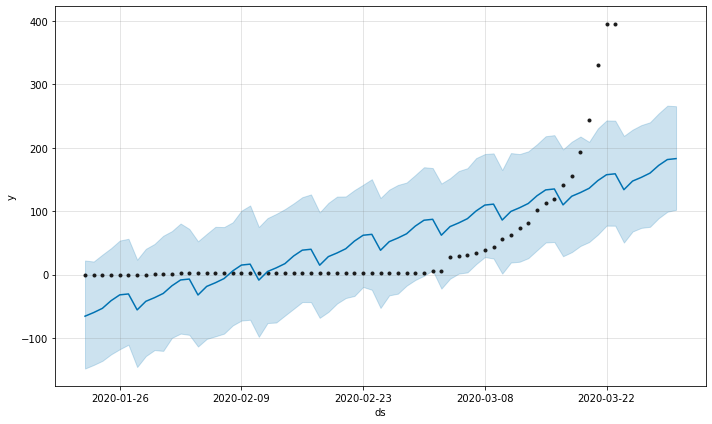

In [81]:
india_confirmed_plot = m.plot(forecast)

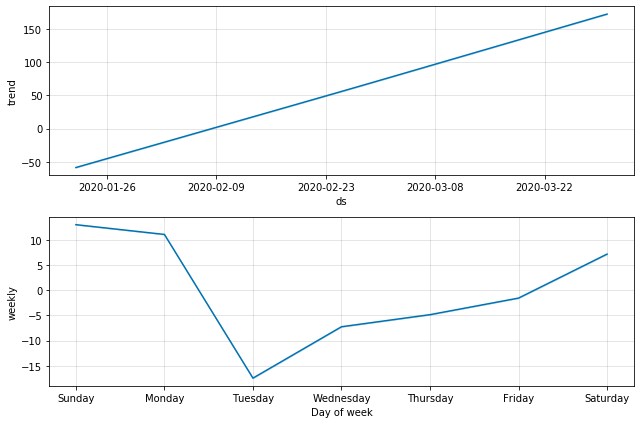

In [82]:
india_confirmed_plot = m.plot_components(forecast)

In [83]:
india_recovered.columns = ['ds','y']
india_recovered['ds'] = pd.to_datetime(india_recovered['ds'])
m = Prophet()
m.fit(india_recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [84]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,12.347317,6.692112,17.922693
65,2020-03-27,12.904069,7.153542,18.839068
66,2020-03-28,13.238538,7.675129,18.730037
67,2020-03-29,15.017417,9.606760,20.575496
68,2020-03-30,15.018436,9.610445,21.063607


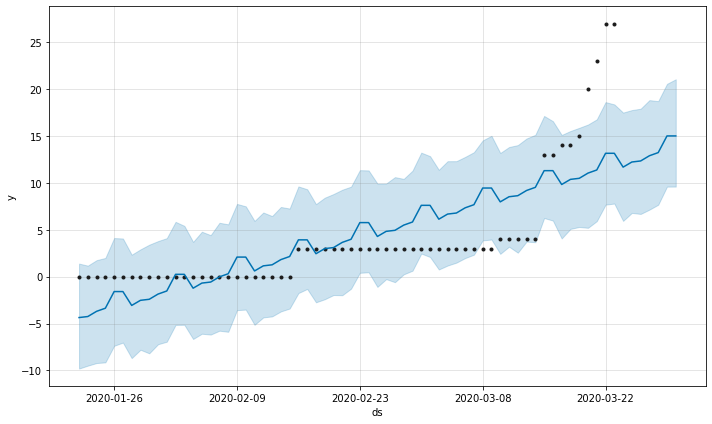

In [85]:
india_recovered_forecast_plot = m.plot(forecast)

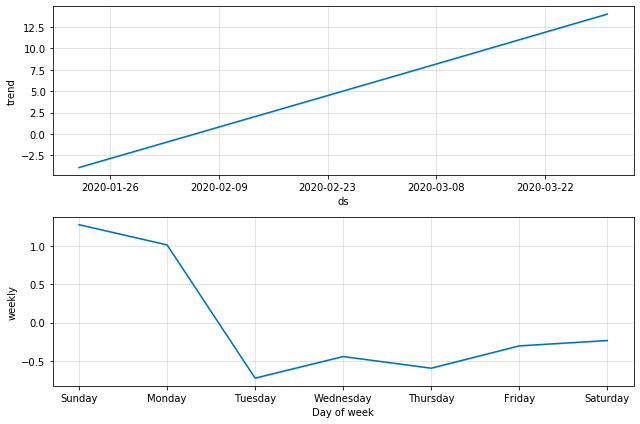

In [86]:
india_recovered_forecast_plot = m.plot_components(forecast)

In [87]:
india_deaths.columns = ['ds','y']
india_deaths['ds'] = pd.to_datetime(india_deaths['ds'])
m = Prophet()
m.fit(india_deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [88]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,2.561546,0.986213,4.106690
65,2020-03-27,2.784182,1.188586,4.359458
66,2020-03-28,2.673488,1.081723,4.205270
67,2020-03-29,3.007224,1.590145,4.568571
68,2020-03-30,3.007627,1.411306,4.623812


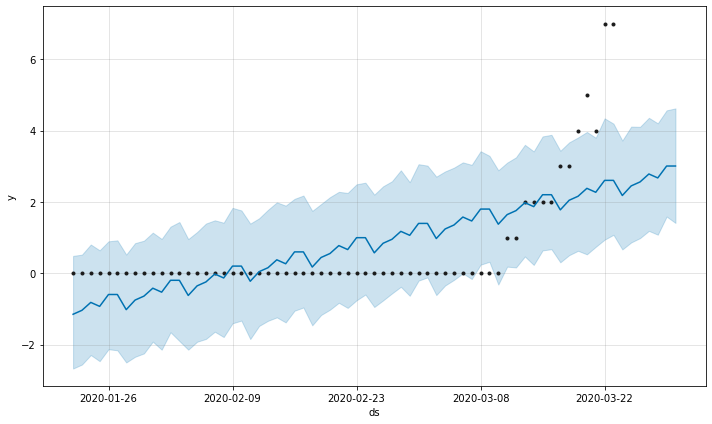

In [89]:
india_deaths_plot = m.plot(forecast)

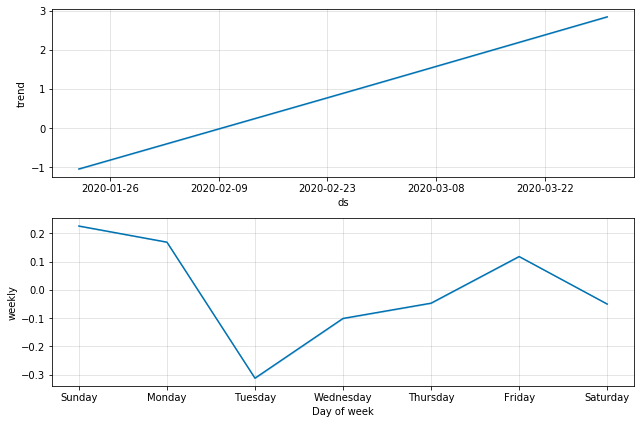

In [90]:
india_deaths_forecast_plot = m.plot_components(forecast)